In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation

# for animation definitely use
%matplotlib notebook
# for static plots use
# %matplotlib inline

from scipy.constants import (physical_constants as phys, c, m_u, hbar, pi, e, m_e)

# %load_ext line_profiler

from trap import Trap

# 1e3 ions hanging in the trap

<IPython.core.display.Javascript object>


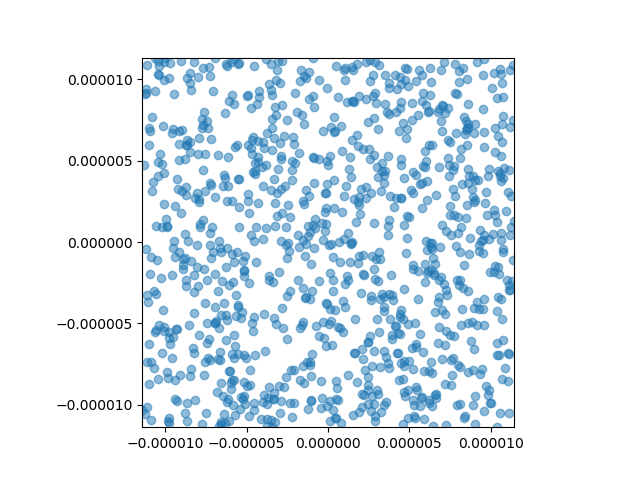

C:\Program Files\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [30]:
trap = Trap(1002, sigmaV=1e3, viscosity=1e5, micro=True, Uz=2, V=100)
x=2
y=0
plt.scatter(trap.positions[:,y], trap.positions[:,x], alpha=0.5)
plt.xlim(min(trap.positions[:,y]), max(trap.positions[:,y]))
plt.ylim(min(trap.positions[:,x]), max(trap.positions[:,x]))
plt.axes().set_aspect('equal')
plt.show()

# and if one ion should accidentally flap

<IPython.core.display.Javascript object>


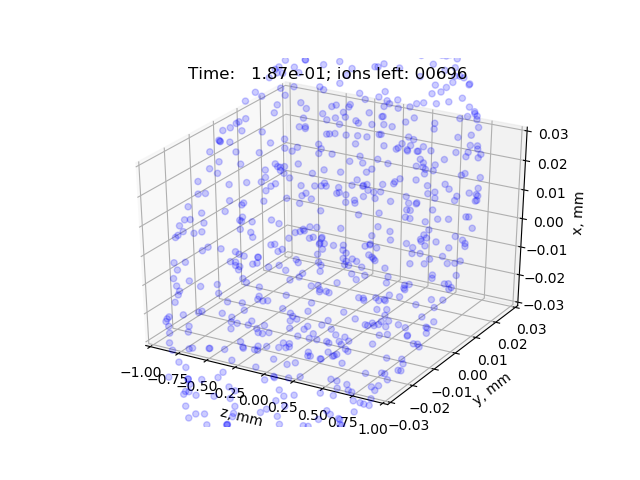

In [32]:
def update(num=0):
    meta = trap(steps=10, dt=1e-8)
    title.set_text('Time: {}; ions left: {}'.format(meta[0], meta[1]))
    graph._offsets3d = (1e3*trap.positions[:,2],
                        1e3*trap.positions[:,1],
                        1e3*trap.positions[:,0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('z, mm')
ax.set_ylabel('y, mm')
ax.set_zlabel('x, mm')

ax.set_xlim(-1,1)
ax.set_ylim(-0.03, +0.03)
ax.set_zlim(-0.03, +0.03)


graph = ax.scatter(1e3*trap.positions[:,2],
                   1e3*trap.positions[:,1],
                   1e3*trap.positions[:,0],
                   c='b', marker='o', alpha=0.2)
title = ax.set_title('Time: {}; ions left: {}'.format(0, len(trap.positions)))

ani = matplotlib.animation.FuncAnimation(fig, update, 20, interval=50, repeat=True)
plt.show()
# plt.rcParams['animation.ffmpeg_path'] ='C:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'
# ani.save('ions3.mp4', writer='ffmpeg', fps=20)

# there'll be 1e3-1 ions hanging in the trap

In [26]:
x=2
y=0
rx = [1e3*position[x] for position in trap.positions if abs(position[1])<3e-5]
ry = [1e3*position[y] for position in trap.positions if abs(position[1])<3e-5]
plt.scatter(rx, ry, alpha=1)
# plt.xlim(min(trap.positions[:,x]), max(trap.positions[:,x]))
# plt.ylim(min(trap.positions[:,y]), max(trap.positions[:,y]))
plt.axes().set_aspect('equal')
# plt.savefig('crystal2.pdf')
plt.show()

C:\Program Files\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [27]:
v = np.sqrt(sum(trap.velocities[:,j]*trap.velocities[:,j] for j in range(3)))
a,b,c=plt.hist(v, 100, normed=True)